# Rough Book: To inform features, model type to be used in backfill and training pipeline

In [1]:
import pandas as pd

In [2]:
diabetes_df = pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [3]:
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
diabetes_df.isnull().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

In [7]:
diabetes_df.shape

(100000, 9)

In [8]:
duplicates = diabetes_df.duplicated()
diabetes_df[duplicates]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [9]:
###feature engineering some new features
# diabetes_df["bmi_age_ratio"] = diabetes_df["bmi"] / diabetes_df["age"]
# diabetes_df["blood_glucose_level_age_ratio"] = diabetes_df["blood_glucose_level"] / diabetes_df["age"]
# diabetes_df['hypertension_heart_disease'] = diabetes_df['hypertension'] * diabetes_df['heart_disease']
# diabetes_df['hba1c_glucose_ratio'] = diabetes_df['HbA1c_level'] / diabetes_df['blood_glucose_level']
# diabetes_df['health_risk_score'] =  diabetes_df['hypertension'] +  diabetes_df['heart_disease']
# diabetes_df["HbA1c_level_blood_glucose_level_interaction"]  = diabetes_df["HbA1c_level"] *	diabetes_df["blood_glucose_level"]
# diabetes_df['HbA1c_glucose_interaction'] = diabetes_df['HbA1c_level'] * diabetes_df['blood_glucose_level']
# diabetes_df['bmi_age_interaction'] = diabetes_df['bmi'] * diabetes_df['age']

In [10]:
diabetes_df = diabetes_df.drop_duplicates()
print(diabetes_df.shape)
total_data = diabetes_df.shape[0]

(96146, 9)


In [11]:
cat_features = diabetes_df.columns[diabetes_df.dtypes == 'object'].tolist()
num_features = diabetes_df.columns[(diabetes_df.dtypes == 'int64') | (diabetes_df.dtypes == 'float64')].tolist()


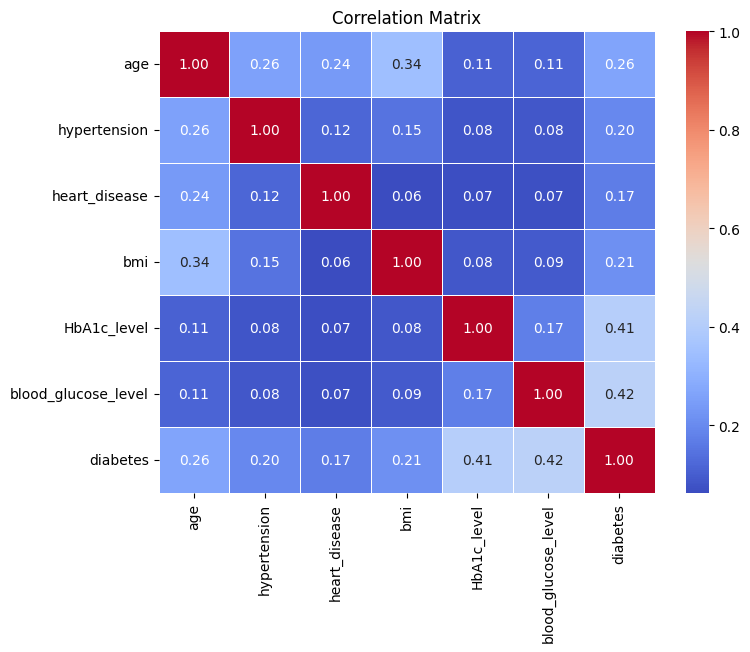

In [12]:
#correlation matrix of numerical features
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = diabetes_df[num_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
diabetes_df.drop(cat_features, axis=1, inplace=True)

In [14]:
target_dict = diabetes_df["diabetes"].value_counts().to_dict()
len(target_dict)

2

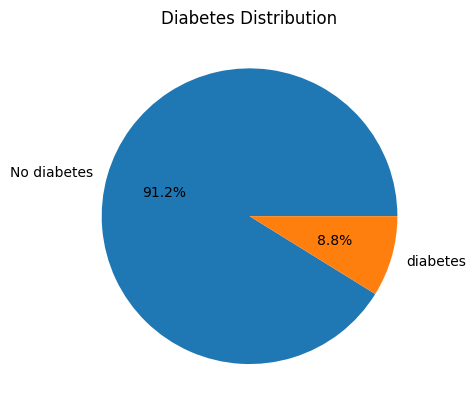

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.pie(target_dict.values(), labels=["No diabetes", "diabetes"], autopct='%1.1f%%')
ax.set_title("Diabetes Distribution")
plt.show()

In [16]:
diabetes_df["diabetes"].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

In [17]:
#using catboostgradient to classify
!pip install catboost --quiet

In [18]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
# Y_all = diabetes_df["diabetes"]
# X_all = diabetes_df.drop("diabetes", axis=1)

In [20]:
# X_train, X_eval, y_train, y_eval = train_test_split(X_all, Y_all, test_size=0.2, random_state=42)

In [21]:
# solving unbalanced dataset problem with smote
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [19]:
!pip install ydata-synthetic --quiet

In [20]:
# solving unbalanced dataset problem using ydata_synthetic.synthesizers
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
from ydata_synthetic.synthesizers.regular import RegularSynthesizer

#Synthesize the minority class
training_df = diabetes_df.loc[diabetes_df['diabetes'] == 1].copy()
training_df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
6,44.0,0,0,19.31,6.5,200,1
26,67.0,0,1,27.32,6.5,200,1
38,50.0,1,0,27.32,5.7,260,1
40,73.0,0,0,25.91,9.0,160,1
53,53.0,0,0,27.32,7.0,159,1
...,...,...,...,...,...,...,...
99935,65.0,1,1,33.55,8.2,140,1
99938,55.0,0,1,30.42,6.2,300,1
99957,61.0,0,0,34.45,6.5,280,1
99962,58.0,1,0,38.31,7.0,200,1


In [21]:
ctgan_args = ModelParameters(batch_size=500, lr=5e-4, betas=(0.5, 0.9), noise_dim=32, layers_dim=128)
train_args = TrainParameters(epochs=40)

# Train the generator model
synth = RegularSynthesizer(modelname='ctgan', model_parameters=ctgan_args)
synth.fit(data=training_df, train_arguments=train_args, num_cols=num_features, cat_cols=['diabetes'])


Epoch: 0 | critic_loss: 0.28476446866989136 | generator_loss: -0.35731711983680725
Epoch: 1 | critic_loss: -0.08590717613697052 | generator_loss: 0.058459263294935226
Epoch: 2 | critic_loss: 0.539433479309082 | generator_loss: -0.6477953195571899
Epoch: 3 | critic_loss: -0.030946925282478333 | generator_loss: -0.2687406837940216
Epoch: 4 | critic_loss: 0.10834142565727234 | generator_loss: -0.8534377813339233
Epoch: 5 | critic_loss: 0.3838915228843689 | generator_loss: -0.23276886343955994
Epoch: 6 | critic_loss: -0.0905962586402893 | generator_loss: -0.015214962884783745
Epoch: 7 | critic_loss: -0.09342597424983978 | generator_loss: -0.19457760453224182
Epoch: 8 | critic_loss: 0.19805015623569489 | generator_loss: -0.7952404618263245
Epoch: 9 | critic_loss: -0.00719219446182251 | generator_loss: -0.43117213249206543
Epoch: 10 | critic_loss: 0.10344891250133514 | generator_loss: -1.0635919570922852
Epoch: 11 | critic_loss: 0.1663719266653061 | generator_loss: -0.35553500056266785
Epoch

In [22]:
synth_data = synth.sample(67000)

In [23]:
synth_data['diabetes'] = 1
synth_data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,79.319329,0,0,38.135074,8.169386,216,1
1,79.263271,0,0,28.642383,6.825512,299,1
2,79.688182,0,0,34.010971,5.679890,253,1
3,78.975719,0,0,32.473522,5.717253,282,1
4,77.566006,0,0,30.266252,7.511460,125,1


In [24]:
combined_data = pd.concat([diabetes_df, synth_data], ignore_index=True)
print(combined_data.shape)
combined_data.info()

(163146, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163146 entries, 0 to 163145
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  163146 non-null  float64
 1   hypertension         163146 non-null  int64  
 2   heart_disease        163146 non-null  int64  
 3   bmi                  163146 non-null  float64
 4   HbA1c_level          163146 non-null  float64
 5   blood_glucose_level  163146 non-null  int64  
 6   diabetes             163146 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 8.7 MB


In [25]:
duplicates = combined_data.duplicated()
duplicates.sum()

9054

In [26]:
combined_data = combined_data.drop_duplicates()
print(combined_data.shape)

(154092, 7)


In [27]:
Y_all = combined_data["diabetes"]
X_all = combined_data.drop("diabetes", axis=1)

In [28]:
X_train, X_eval, y_train, y_eval = train_test_split(X_all, Y_all, test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_all.shape

((123273, 6), (154092, 6))

In [30]:
#getting test data set
X_eval, X_test, y_eval, y_test = train_test_split(X_eval, y_eval, test_size=0.5, random_state=42)

In [31]:
X_train.shape, X_eval.shape, X_test.shape

((123273, 6), (15409, 6), (15410, 6))

In [44]:
class_count = len(target_dict)
count_0 = combined_data[combined_data["diabetes"] == 0].shape[0]
count_1 = combined_data[combined_data["diabetes"] == 1].shape[0]

In [45]:
class_weight = {"class_0": (round(total_data/(class_count * count_0), 3)),
                "class_1": (round(total_data/(class_count*count_1),3))}

In [46]:
class_weight

{'class_0': 0.611, 'class_1': 0.638}

In [47]:
list_class_weight =  [value for key, value in class_weight.items()]

In [48]:
train_pool = Pool(X_train, y_train, cat_features=None)
eval_pool = Pool(X_eval, y_eval, cat_features=None)

In [49]:
# param_grid = {
#     'iterations': [500, 1000, 1500],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'depth': [4, 6, 8, 10],
#     'l2_leaf_reg': [1, 3, 5, 7, 9],
#     'bagging_temperature': [0.1, 0.5, 1, 2, 5],
#     'random_strength': [1, 2, 5, 10],
#     'border_count': [32, 50, 100],
#     'class_weights': [list_class_weight]
# }

In [50]:
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    class_weights=list_class_weight,
    random_seed=42,
    early_stopping_rounds=50
)

In [51]:
# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_grid,
#     n_iter=50,
#     scoring='f1',
#     cv=3,
#     verbose=3,
#     random_state=42,
#     n_jobs=-1
# )

In [52]:
# random_search.fit(X_train, y_train, cat_features=None)

In [53]:
# best_model = random_search.best_estimator_

# # Make predictions
# y_pred = best_model.predict(X_eval)
# y_proba = best_model.predict_proba(X_eval)[:, 1]

# # Evaluate the model
# print(classification_report(y_eval, y_pred))

In [54]:
model.fit(train_pool, eval_set=eval_pool, verbose=100, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9819230	best: 0.9819230 (0)	total: 32.3ms	remaining: 32.3s
100:	test: 0.9974879	best: 0.9974879 (100)	total: 3.31s	remaining: 29.5s
200:	test: 0.9975394	best: 0.9975554 (174)	total: 8.29s	remaining: 32.9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9975553524
bestIteration = 174

Shrink model to first 175 iterations.


In [55]:
y_pred = model.predict(X_eval)

Support for third party widgets will remain active for the duration of the session. To disable support:

In [56]:
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7831
           1       1.00      0.96      0.98      7578

    accuracy                           0.98     15409
   macro avg       0.98      0.98      0.98     15409
weighted avg       0.98      0.98      0.98     15409



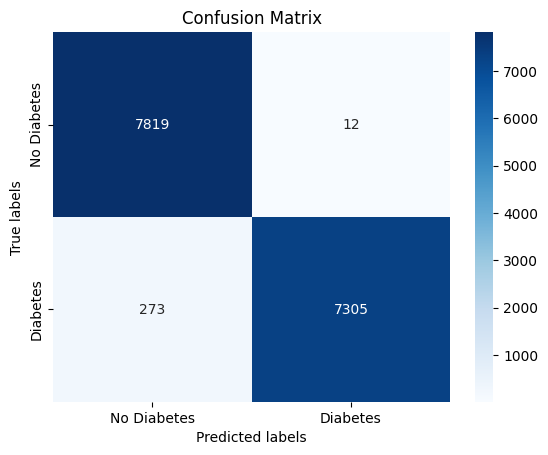

In [57]:
from sklearn.metrics import confusion_matrix,precision_score, recall_score, classification_report
import seaborn as sns
def plot_confusion_matrix(y_true, y_pred):
  class_names = ['No Diabetes', 'Diabetes']
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()
plot_confusion_matrix(y_eval, y_pred)

In [60]:
y_test_pred  = model.predict(X_test)

In [61]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7841
           1       1.00      0.97      0.98      7569

    accuracy                           0.98     15410
   macro avg       0.98      0.98      0.98     15410
weighted avg       0.98      0.98      0.98     15410



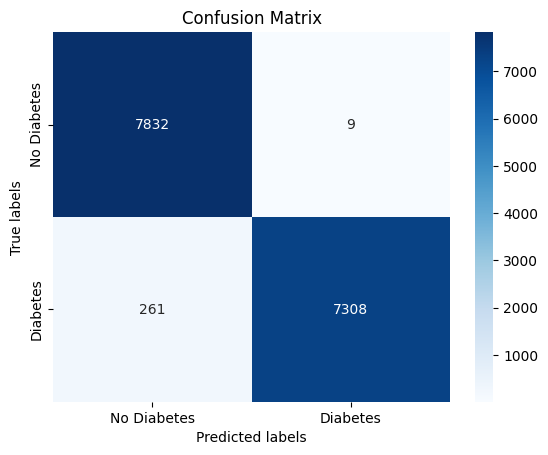

In [62]:
plot_confusion_matrix(y_test, y_test_pred)

In [63]:
!pip freeze > requirements.txt


In [64]:
combined_data["diabetes"].value_counts()

diabetes
0    78693
1    75399
Name: count, dtype: int64

In [65]:
# messing around with smote
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_foo, y_foo = smote.fit_resample(X_train, y_train)

In [66]:
y_pred_foo = model.predict(X_foo)

In [67]:
print(classification_report(y_foo, y_pred_foo))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     63021
           1       1.00      0.97      0.98     63021

    accuracy                           0.98    126042
   macro avg       0.98      0.98      0.98    126042
weighted avg       0.98      0.98      0.98    126042



In [69]:
plot_confusion_matrix(y_foo, y_pred_foo)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     63021
           1       1.00      0.97      0.98     63021

    accuracy                           0.98    126042
   macro avg       0.98      0.98      0.98    126042
weighted avg       0.98      0.98      0.98    126042

